In [2]:
run Lattice_functions.ipynb

In [3]:
Lat_Obj = Rect_Lattice(3, 3, 1, 1, 10, [1, 3, 7, 9], [1, 3, 7, 9], [1, 3, 7, 9])
Lat_Obj = add_braces_to_rectangular_lattice(Lat_Obj, 10, '|')
Lat_Obj = add_layers_in_z_direction(Lat_Obj, 2, 0.2, 10, 10, [1, 2, 3, 4])
xp = range(1, len(Lat_Obj.springs) + 1)
for i in xp:
    Lat_Obj.springs[i - 1].l0 = 1.05

In [5]:
x0 = []
y0 = []
z0 = []
for i in Lat_Obj.nodes:
    x0.insert((i.n - 1), i.x)
    y0.insert((i.n - 1), i.y)
    z0.insert((i.n - 1), i.z)
    
coord0 = x0 + y0 + z0
nNodes = int(len(coord0)/3)

In [6]:
lb = -np.inf*np.ones(len(coord0))
ub = np.inf*np.ones(len(coord0))

for i in Lat_Obj.support_x:
    lb[i - 1] = x0[i - 1]
    ub[i - 1] = x0[i - 1]

for i in Lat_Obj.support_y:
    lb[nNodes + i - 1] = y0[i - 1]
    ub[nNodes + i - 1] = y0[i - 1]
    
for i in Lat_Obj.support_z:
    lb[(2*nNodes) + i - 1] = z0[i - 1]
    ub[(2*nNodes) + i - 1] = z0[i - 1]


bounds = Bounds(lb, ub)

In [7]:
x0 = coord0
>>> res = minimize(Energy, x0, method='trust-constr', options={'verbose': 1}, bounds=bounds)

`xtol` termination condition is satisfied.
Number of iterations: 38, function evaluations: 2090, CG iterations: 113, optimality: 5.96e-07, constraint violation: 0.00e+00, execution time:  1.7 s.


In [8]:
result = res.x

In [9]:
x = result[0 : nNodes]
y = result[nNodes : 2*nNodes]
z = result[2*nNodes : 3*nNodes]

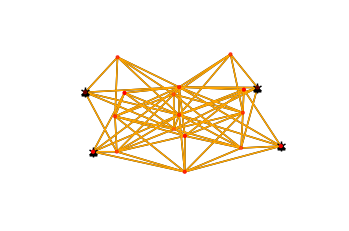

In [10]:
ax = Lattice_Plot(x, y, z, Lat_Obj, xp, 'Z', 30, 85, 1)

In [ ]:
# Task 1
# Bilayer model of the plate